In [31]:
include("Create_Sample.jl")
include("MIP_SPLIT.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")
include("cross_escape.jl")
include("intersection.jl")


Improve_after_removing_intersections (generic function with 1 method)

In [ ]:

dir_name = "set1"
sample_names = ["mtsp100_3", "mtsp100_5", "mtsp100_10", "mtsp100_20",
"mtsp150_3", "mtsp150_5", "mtsp150_10", "mtsp150_20", "mtsp150_30", "gtsp150_3", "gtsp150_5", "gtsp150_10", "gtsp150_20", "gtsp150_30",
"kroa200_3", "kroa200_5","kroa200_10","kroa200_20", "lin318_3", "lin318_5", "lin318_10", "lin318_20"]

# T, depot, Customers = Calculate_TSPLIB(sample_name)
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]
for sample_name in sample_names
    println(sample_name)
    m, T, depot_, customers = read_data(dir_name, sample_name)
    Customers = copy(transpose(customers))
    depot = Float64.(depot_)
    n = size(T)[1]-2
    demands = ones(Int, n)
    W = 1000
    h = 0.3
    popsize = (10,20)
    k_tournament = 2
    num_iter = 100000
    time_limit = (n+1)*1.36/5
    Mutation_Chance = 1.0
    num_runs = 10
    num_nei = 2
    avg = 0.0
    best = Inf
    worst = 0.0
    crossover_functions = [5, 7, 8]

    t1 = time()
    for i=1:num_runs
        P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
                    k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
    #             roullet_ = roullet_ + roullet
        avg += P[1].fitness
        push!(all_chrms, P[1])
        if P[1].fitness < best
            best = P[1].fitness
            best_chrm = P[1]
        end
        if P[1].fitness > worst
            worst = P[1].fitness
            worst_chrm = P[1]
        end
    end
    t2 = time()
    println("Results for ", sample_name, " ,m=", m)
    println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
        "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
end

mtsp100_3
The best objective achieved in 5854 generations is: 8509.1624832977 and it took 27.205999851226807 seconds.
The best objective achieved in 6584 generations is: 8509.162483297694 and it took 27.205000162124634 seconds.
The best objective achieved in 6745 generations is: 8509.162483297696 and it took 27.206000089645386 seconds.
The best objective achieved in 6386 generations is: 8509.162483297696 and it took 27.215999841690063 seconds.
The best objective achieved in 6573 generations is: 8509.162483297696 and it took 27.200999975204468 seconds.
The best objective achieved in 7124 generations is: 8509.162483297696 and it took 27.200000047683716 seconds.
The best objective achieved in 6707 generations is: 8509.1624832977 and it took 27.20299983024597 seconds.
The best objective achieved in 6986 generations is: 8509.162483297696 and it took 27.3270001411438 seconds.
The best objective achieved in 7285 generations is: 8509.162483297698 and it took 27.200000047683716 seconds.
The bes

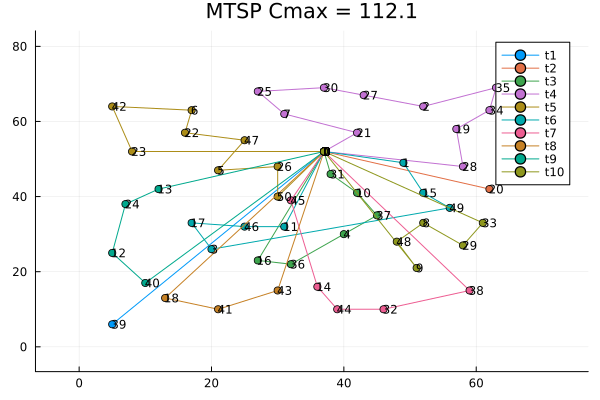

In [3]:
sample_name = "mtsp51_10"
dir_name = "set1"
m, T, depot_, customers = read_data(dir_name, sample_name)
Customers = copy(transpose(customers))
depot = Float64.(depot_)
n = size(T)[1]-2
demands = ones(Int, n)
W = 1000
S= [39, 20, 16, 36, 4, 37, 10, 31, 21, 7, 25, 30, 27, 2, 35, 34, 19, 28, 50, 26, 5, 47, 22, 6, 42, 23, 1, 15, 49, 3, 17, 46, 11, 45, 14, 44, 32, 38, 18, 41, 43, 13, 24, 12, 40, 9, 48, 8, 29, 33]
obj, trips = SPLIT(T, demands, m, W, S)
chrm = Chromosome(S, obj, 0.0, trips)
Draw_Solution(chrm, depot, Customers, "MTSP", chrm.fitness)

In [5]:
length(chrm.tours)

10

In [10]:
chrm.tours[1].Sequence = Int[]
chrm.tours[2].Sequence = [39,20]

2-element Vector{Int64}:
 39
 20

In [19]:
chrm = Chromosome([50, 46, 39, 31, 4, 14, 44, 32, 38, 9, 48, 37, 10, 45, 16, 18, 41, 43, 36, 11, 5, 13, 24, 12, 40, 17, 26, 21, 19, 34, 35, 2, 27, 30, 25, 7, 47, 22, 23, 42, 6, 33, 20, 28, 1, 29, 8, 3, 15, 49], 112.16456695970746, 0.0, Tour[Tour([50, 46, 39], 112.16456695970746), Tour([31, 4, 14, 44, 32, 38, 9, 48, 37, 10], 108.42688613296161), Tour([45, 16, 18, 41, 43, 36, 11], 104.94632584003664), Tour([5, 13, 24, 12, 40, 17, 26], 101.42467674883329), Tour([21, 19, 34, 35, 2, 27, 30, 25, 7], 92.07551076857801), Tour([47, 22, 23, 42, 6], 78.2591783428744), Tour([33, 20, 28, 1], 68.30164543408372), Tour([29, 8], 65.34237368268799), Tour([3], 62.12889826803627), Tour([15, 49], 48.46536636105107)])
# find_tour_neighbors(chrm.tours, Customers, m)
chrm.tours

10-element Vector{Tour}:
 Tour([50, 46, 39], 112.16456695970746)
 Tour([31, 4, 14, 44, 32, 38, 9, 48, 37, 10], 108.42688613296161)
 Tour([45, 16, 18, 41, 43, 36, 11], 104.94632584003664)
 Tour([5, 13, 24, 12, 40, 17, 26], 101.42467674883329)
 Tour([21, 19, 34, 35, 2, 27, 30, 25, 7], 92.07551076857801)
 Tour([47, 22, 23, 42, 6], 78.2591783428744)
 Tour([33, 20, 28, 1], 68.30164543408372)
 Tour([29, 8], 65.34237368268799)
 Tour([3], 62.12889826803627)
 Tour([15, 49], 48.46536636105107)

In [28]:
tours = chrm.tours
means = [mean(Customers[t1, :], dims=1)[1,:] for t1 in [tours[i].Sequence for i=1:m]]
println(means)


means

[[20.0, 26.0], [44.4, 25.2], [26.571428571428573, 22.0], [14.571428571428571, 35.714285714285715], [46.0, 64.11111111111111], [14.2, 58.2], [57.5, 43.0], [55.0, 30.0], [20.0, 26.0], [54.0, 39.0]]


10-element Vector{Vector{Float64}}:
 [21.545454545454547, 28.363636363636363]
 [43.72727272727273, 27.636363636363637]
 [27.51948051948052, 24.727272727272727]
 [16.61038961038961, 37.1948051948052]
 [45.18181818181818, 63.01010101010101]
 [16.272727272727273, 57.63636363636363]
 [55.63636363636363, 43.81818181818182]
 [53.36363636363637, 32.0]
 [21.545454545454547, 28.363636363636363]
 [52.45454545454545, 40.18181818181818]

In [21]:
distances = zeros(m, m)
for i = 1:m-1
    for j = i+1:m
        distances[i,j] = euclidean(means[i], means[j])
        distances[j,i] = distances[i,j]
    end
end
distances

10×10 Matrix{Float64}:
  0.0      24.4131   7.69309  11.1282  …  35.2278    0.0      36.4005
 24.4131    0.0     18.1135   31.6274     11.6362   24.4131   16.8107
  7.69309  18.1135   0.0      18.2231     29.5328    7.69309  32.2696
 11.1282   31.6274  18.2231    0.0        40.8304   11.1282   39.5652
 46.1352   38.944   46.3769   42.3572     35.2784   46.1352   26.3547
 32.7182   44.733   38.2556   22.4888  …  49.5972   32.7182   44.1891
 41.1734   22.1009  37.3842   43.5424     13.2382   41.1734    5.31507
 35.2278   11.6362  29.5328   40.8304      0.0      35.2278    9.05539
  0.0      24.4131   7.69309  11.1282     35.2278    0.0      36.4005
 36.4005   16.8107  32.2696   39.5652      9.05539  36.4005    0.0

In [8]:
function find_tour_neighbors(tours::Vector{Tour}, Customers::Matrix{Float64}, m::Int)
    means = [mean(Customers[t1, :], dims=1)[1,:] for t1 in [tours[i].Sequence for i=1:m]]
    distances = zeros(m, m)
    for i = 1:m-1
        for j = i+1:m
            distances[i,j] = euclidean(means[i], means[j])
            distances[j,i] = distances[i,j]
        end
    end
    return [sortperm(distances[i,:])[2:min(m,3)] for i=1:m]
end

find_tour_neighbors (generic function with 1 method)

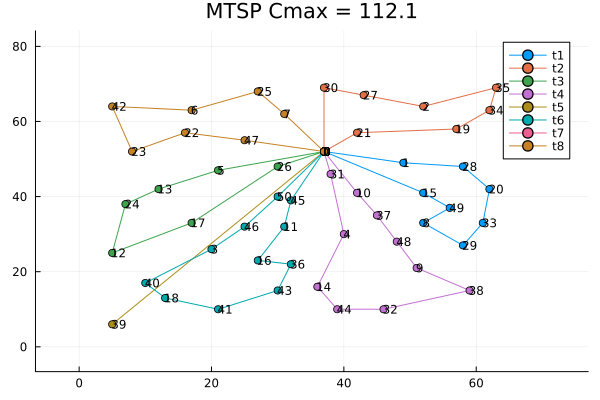

In [7]:
c1 = deepcopy(chrm)
c1 = Enrich_the_chromosome(c1, T, Customers, n)
Draw_Solution(c1, depot, Customers, "MTSP", c1.fitness)

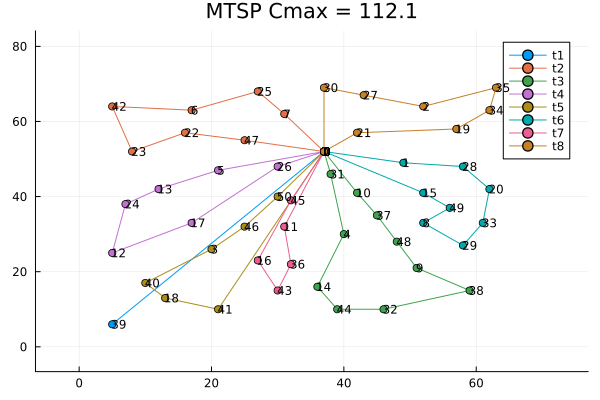

In [8]:
c2 = deepcopy(c)
c2 = Enrich_the_chromosome(c2, T, Customers, n)
Draw_Solution(c2, depot, Customers, "MTSP", c2.fitness)

In [22]:
ones(2,2) * -1

2×2 Matrix{Float64}:
 -1.0  -1.0
 -1.0  -1.0